# Description

Craigslist is the world's largest collection of used vehicles for sale,this dataset which includes every used vehicle entry within the United States on Craigslist. I've used this dataset to do a vehicle price prediction 

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading Data

In [2]:
df=pd.read_csv("vehicles.csv")

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [162]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [163]:
df.shape

(539759, 25)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

# Data cleaning 

In [165]:
r=df.columns
for i in r:
    print(df[i].value_counts())

7091246178    1
7085809585    1
7092244640    1
7091885677    1
7086549719    1
             ..
7092856281    1
7092850140    1
7088653789    1
7090755039    1
7085236228    1
Name: id, Length: 539759, dtype: int64
https://columbia.craigslist.org/cto/d/hopkins-2006-nissan-xterra-rebuilt/7093121779.html               1
https://worcester.craigslist.org/ctd/d/north-oxford-2012-chrysler-300/7090410080.html                  1
https://reno.craigslist.org/ctd/d/sacramento-2008-lexus-is-fully-loaded/7087877774.html                1
https://lasvegas.craigslist.org/ctd/d/north-las-vegas-2015-ford-mustang-gt-50/7092971197.html          1
https://kalispell.craigslist.org/cto/d/kalispell-1987-jeep-wrangler/7079103289.html                    1
                                                                                                      ..
https://greenbay.craigslist.org/ctd/d/neenah-2017-hyundai-elantra-se-4dr/7086660239.html               1
https://flagstaff.craigslist.org/ctd/d/cornville-2

Based on above observation the features which are too common or of no use like url can be dropped

In [166]:
df= df.drop(columns=['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)

In [167]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc
1,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,nc
2,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc
3,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc
4,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ne


In [168]:
df.describe()

,price,year,odometer
count,5.397590e+05,538772.000000,4.407830e+05
mean,1.954214e+05,2009.830982,1.008008e+05
std,2.208252e+07,9.161334,1.767058e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,4.400000e+03,2007.000000,4.703850e+04
50%,9.500000e+03,2012.000000,9.330000e+04
75%,1.792600e+04,2015.000000,1.377550e+05
max,4.294967e+09,2021.000000,6.480922e+07


# Handling outliers

Lets see if any outliers in Target variable as we remove them the model can be more accurate because they cause a bring a lot of difference in values of mean and SD.

the difference between 75% value and max value is too large so lets leave 10% values at both ends of a distribution

In [169]:
rr=sorted(df["price"])

In [170]:
quantile1, quantile3= np.percentile(rr,[10,90])

In [171]:
print(quantile1,quantile3)

500.0 27500.0


In [172]:
df=df[(df.price < 27500) & (df.price >= 500 )]
df.shape

(432385, 15)

Lets observe the odometer column

In [173]:
r=sorted(df["odometer"])
r

[0.0,
 38484.0,
 43418.0,
 43780.0,
 50019.0,
 54296.0,
 70314.0,
 71000.0,
 73000.0,
 75225.0,
 77118.0,
 78877.0,
 85000.0,
 85000.0,
 85127.0,
 87321.0,
 90186.0,
 97010.0,
 97108.0,
 100224.0,
 112383.0,
 113772.0,
 117000.0,
 118965.0,
 119154.0,
 120265.0,
 124446.0,
 133000.0,
 135775.0,
 138335.0,
 139904.0,
 145000.0,
 146260.0,
 146353.0,
 146353.0,
 155000.0,
 157909.0,
 162214.0,
 162867.0,
 167364.0,
 168798.0,
 169916.0,
 172470.0,
 181020.0,
 185123.0,
 190000.0,
 193172.0,
 193800.0,
 194050.0,
 196123.0,
 212526.0,
 nan,
 nan,
 222000.0,
 225667.0,
 nan,
 nan,
 2870.0,
 11111.0,
 22104.0,
 38127.0,
 39439.0,
 42388.0,
 57954.0,
 64430.0,
 70864.0,
 72000.0,
 75000.0,
 79212.0,
 80903.0,
 85800.0,
 88705.0,
 91992.0,
 93190.0,
 93893.0,
 106117.0,
 nan,
 nan,
 94223.0,
 101903.0,
 104174.0,
 109473.0,
 110000.0,
 111142.0,
 112383.0,
 115053.0,
 118282.0,
 128413.0,
 128536.0,
 130725.0,
 132285.0,
 133100.0,
 135877.0,
 139015.0,
 139442.0,
 140742.0,
 142476.0,
 14450

There are nan values and only one 0 value

In [174]:
df["odometer"].isna().sum()

80206

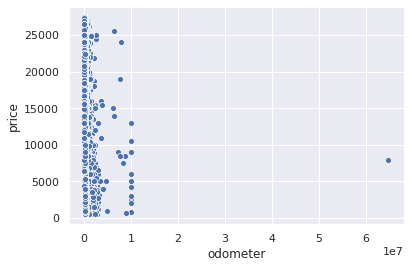

In [175]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [176]:
df["odometer"].max()

64809218.0

In [177]:
df.drop(df[df["odometer"]==64809218.0].index,inplace=True)

In [178]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

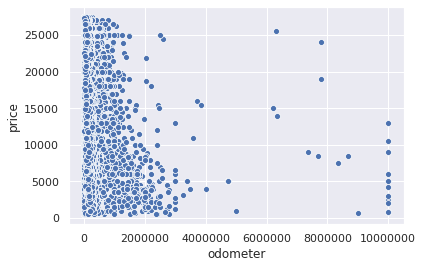

In [179]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [180]:
df["odometer"].isna().sum()

80206

here the values above 3000000  can be considered as outliers

In [181]:
df=df[(df.odometer < 3000000)]

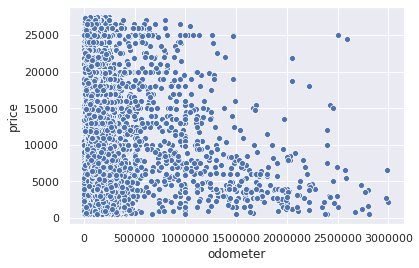

In [182]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Now lets see year column

In [183]:
df["odometer"].isna().sum()

0

In [184]:
df["year"].isna().sum()

413

the null values in a year column cannot be replaced so lets eliminate them

In [185]:
df["year"].min()

0.0

we must alo drop this 0 values

In [186]:
df.drop(df[df["year"]==0.0].index,inplace=True)

In [187]:
df=df.dropna(subset=['year'])

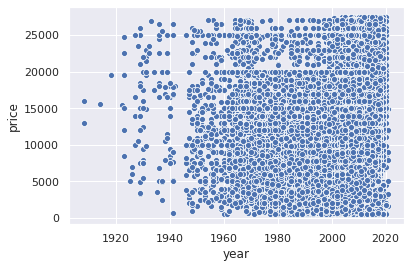

In [188]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [189]:
df=df[(df.year > 1940)]

we have removed outliers from all three numerical columns .
now lets how we can remove with nan values if any.

# Handling Null Values

I am taking out % of null values in each column

In [190]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,22639700,64.604
condition,12309900,35.127
cylinders,11826600,33.748
paint_color,8496900,24.247
drive,7496300,21.391
type,6496400,18.538
manufacturer,1009100,2.880
model,310100,0.885
transmission,283500,0.809
fuel,225500,0.643


In [191]:
df.condition.value_counts()

excellent    104964
good          95798
like new      19551
fair           6166
new             429
salvage         429
Name: condition, dtype: int64

the misssing values in the condition can be found using odometer as mileage affects condition of car.

what i am trying to do here is finding mean value of odometer readings grouping by there conditions

In [192]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [193]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 87806.17
Excellent average odometer: 113088.59
Good average odometer: 109720.47
Fair average odometer: 184276.67
Salvage average odometer: 157700.62


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [194]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

the values are being filled by the values from above calculated mean value ranges

In [195]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [196]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,22639700,64.604
cylinders,11826600,33.748
paint_color,8496900,24.247
drive,7496300,21.391
type,6496400,18.538
manufacturer,1009100,2.880
model,310100,0.885
transmission,283500,0.809
fuel,225500,0.643
title_status,185700,0.530


I am droping the null values with less then 5% nan.

In [197]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

I am also droping the columns with more then 30% null values.
but cylinders can be important feature .

In [198]:
df=df.drop(["size"],axis=1)

In [199]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,11048100,33.345
paint_color,7943400,23.975
drive,7034400,21.231
type,6135900,18.519
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [200]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [201]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [202]:
df.isnull().sum()

price            0
year             0
manufacturer     0
model            0
condition        0
cylinders       11
fuel             0
odometer         0
title_status     0
transmission     0
drive            2
type             0
paint_color      0
state            0
dtype: int64

In [203]:
df=df.dropna(subset=['cylinders','drive'])

In [204]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

# Exploratory Data Analysis

In [205]:
from scipy import stats

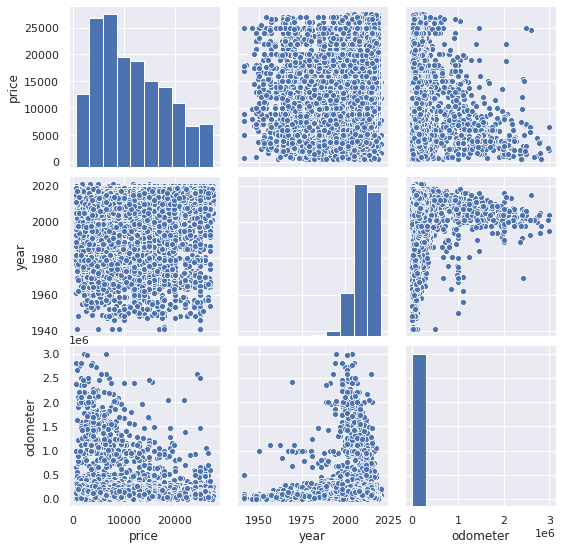

In [206]:
sns.pairplot(df)

The above were relation between numerical values of the table.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331313 entries, 13 to 539758
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         331313 non-null  int64  
 1   year          331313 non-null  float64
 2   manufacturer  331313 non-null  object 
 3   model         331313 non-null  object 
 4   condition     331313 non-null  object 
 5   cylinders     331313 non-null  object 
 6   fuel          331313 non-null  object 
 7   odometer      331313 non-null  float64
 8   title_status  331313 non-null  object 
 9   transmission  331313 non-null  object 
 10  drive         331313 non-null  object 
 11  type          331313 non-null  object 
 12  paint_color   331313 non-null  object 
 13  state         331313 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 47.9+ MB


In [208]:
c=df.columns
for i in c:
    print(df[i].value_counts())

6995     4157
7995     4043
5995     3976
8995     3793
4995     3790
         ... 
20189       1
15201       1
23405       1
5220        1
4098        1
Name: price, Length: 11443, dtype: int64
2013.0    25718
2014.0    24097
2012.0    23670
2017.0    23281
2016.0    22704
          ...  
1951.0       11
1958.0        9
2021.0        6
1946.0        3
1942.0        1
Name: year, Length: 78, dtype: int64
ford               59552
chevrolet          48560
toyota             26813
nissan             19985
honda              18755
jeep               16646
gmc                13129
dodge              11972
ram                11941
bmw                10226
hyundai             9371
subaru              8883
volkswagen          8279
mercedes-benz       7517
kia                 7164
chrysler            6105
buick               5521
cadillac            5226
mazda               4812
lexus               4589
audi                4235
infiniti            2938
acura               2920
pontiac          

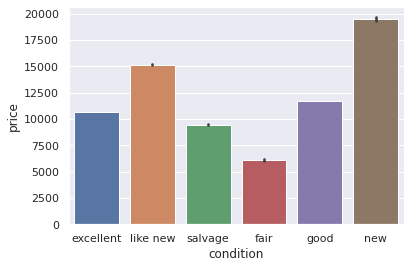

In [209]:
ax = sns.barplot(x="condition", y="price", data=df)

Clearly vehicles with condition  new has highest price as one expects.

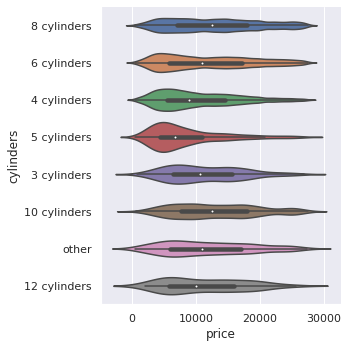

In [210]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

This violinplot provides clear idea about the distribution of number of cylinders and the price.

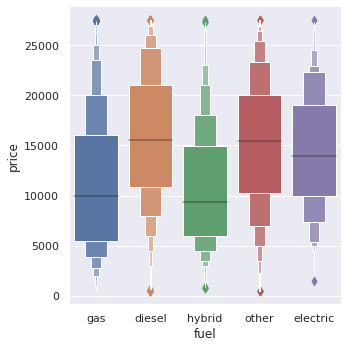

In [211]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

This figure shows the price range between which majority of each type of car based on fuel lies.

Gas=5k-17k

diesel=12k-20k

hybrid=7k-15k

other=11k-20k

electric=10k-18k

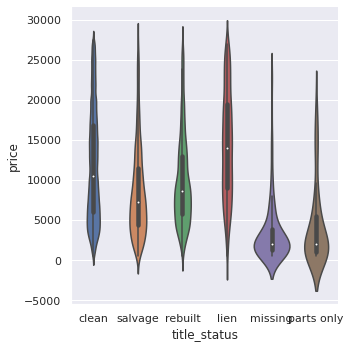

In [212]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

The distribution of price of cars based on title_status can be seen here.

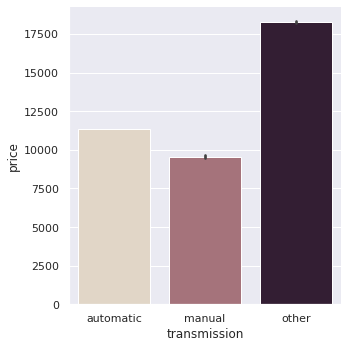

In [213]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

The relation between price and transmission.

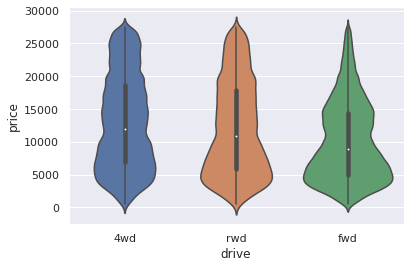

In [214]:
sns.violinplot(x=df.drive, y=df.price);

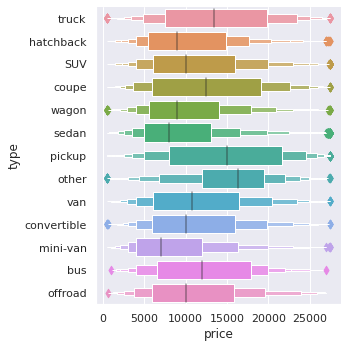

In [215]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle.

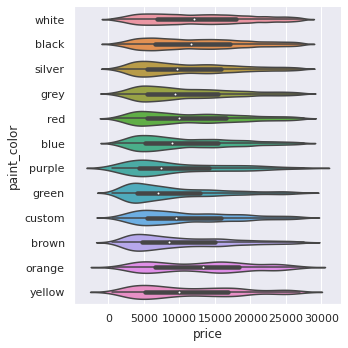

In [216]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

Important observation can be obtained from the above figure regarding the distribution of price bracket for each color of vehicle.

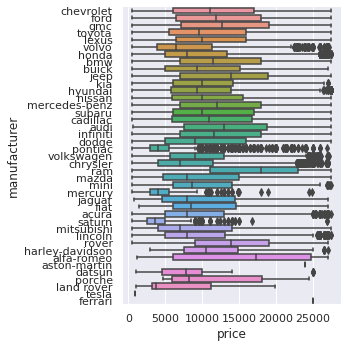

In [217]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

It just gives and idea about prices based on the manufacturer.

#  Label Processing


In [218]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [219]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [220]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

# Split Train and Test data


In [221]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [222]:
y= df.price
X= df.drop('price',axis=1)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(265050, 13) (265050,)
(66263, 13) (66263,)


# Training Model

# Random Forest

In [225]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [226]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [227]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1610.98
Mean Squared Error: 6585111.0
Root Mean Squared Error: 2566.15
86.02339690261907


The accuracy is 86.02 .